# **Exploratory Data Analysis (EDA) on AI Sector Stocks**

**Author: Panagiotis Kardatos, Mathematician**

This notebook performs a thorough statistical and mathematical analysis of AI Hardware & Cloud Leaders including NVIDIA, GOOGLE, META, MICROSOFT over the period 01/01/2025 - Present.

The goal is to explore the data, understand relationships, distributions, trends, and volatility using a purely mathematical/statistical perspective, without financial speculation.

**Key objectives:**
- Identify trends and patterns in stock prices.
- Quantify volatility, correlations, and statistical properties.
- Provide insights suitable for machine learning feature engineering.


## **Step 1: Data Import and Setup**

We import the necessary libraries (pandas, numpy, matplotlib, seaborn, datetime) and download stock data from **Yahoo Finance**. We ensure that the dataset is ready for inspection and analysis.


In [88]:
#Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

In [89]:
#Getting a first sample to have a view of the column structure.
sample = yf.download(tickers="NVDA", start="2025-01-01", end="2025-01-5")
sample.columns

/tmp/ipython-input-3367788182.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sample = yf.download(tickers="NVDA", start="2025-01-01", end="2025-01-5")
[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [90]:
#Customizing yesterday's day, setting the ticker list and download data.
yesterday=(datetime.today()-timedelta(days=1)).strftime('%Y-%m-%d')
L=['NVDA', 'GOOGL', 'META', 'MSFT']
data1={ticker : yf.download(ticker, start="2025-01-01", end=yesterday)[('Close', ticker)] for ticker in L} #Close Data
data2={ticker : yf.download(ticker, start="2025-01-01", end=yesterday)[('Volume', ticker)] for ticker in L} #Volume Data

df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

/tmp/ipython-input-3336821011.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1={ticker : yf.download(ticker, start="2025-01-01", end=yesterday)[('Close', ticker)] for ticker in L} #Close Data
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3336821011.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1={ticker : yf.download(ticker, start="2025-01-01", end=yesterday)[('Close', ticker)] for ticker in L} #Close Data
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3336821011.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1={ticker : yf.download(ticker, start="2025-01-01", end=yesterday)[('Close', ticker)] for ticker in L} #Close Data
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3336821011.py:4: FutureWarning: YF.download() has changed argument au

##**Step 2: Data Inspection**

We examine the dataset to understand its structure and basic statistics. This helps to identify any anomalies before proceeding with cleaning and analysis.

In [91]:
df1.head(), df2.head() # View strucure, starting date

(                  NVDA       GOOGL        META        MSFT
 Date                                                      
 2025-01-02  138.279877  188.814423  597.843567  416.292511
 2025-01-03  144.438538  191.166748  603.220947  421.036469
 2025-01-06  149.397446  196.230255  628.731384  425.511871
 2025-01-07  140.109467  194.854736  616.450073  420.061798
 2025-01-08  140.079483  193.319748  609.296753  422.239838,
                  NVDA     GOOGL      META      MSFT
 Date                                               
 2025-01-02  198247200  20370800  12682300  16896500
 2025-01-03  229322500  18596200  11436800  16662900
 2025-01-06  265377400  29563600  14560800  20573600
 2025-01-07  351782200  26487200  12071500  18139100
 2025-01-08  227349900  24864800  10085800  15054600)

In [92]:
df1.tail(), df2.tail() #To ensure we are up to date

(                  NVDA       GOOGL        META        MSFT
 Date                                                      
 2025-09-29  181.850006  244.050003  743.400024  514.599976
 2025-09-30  186.580002  243.100006  734.380005  517.950012
 2025-10-01  187.240005  244.899994  717.340027  519.710022
 2025-10-02  188.889999  245.690002  727.049988  515.739990
 2025-10-03  187.619995  245.350006  710.559998  517.349976,
                  NVDA     GOOGL      META      MSFT
 Date                                               
 2025-09-29  193063500  32505800   9246800  17617800
 2025-09-30  236981000  34724300  16226800  19728200
 2025-10-01  173844900  31658200  20419600  22632300
 2025-10-02  136805800  25483300  11415300  21222900
 2025-10-03  137340500  30232900  16110000  15104200)

In [93]:
#Check for data types and shapes (shapes must be equal) for all DataFrames
df1.info() , df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 2025-01-02 to 2025-10-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NVDA    189 non-null    float64
 1   GOOGL   189 non-null    float64
 2   META    189 non-null    float64
 3   MSFT    189 non-null    float64
dtypes: float64(4)
memory usage: 7.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 2025-01-02 to 2025-10-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NVDA    189 non-null    int64
 1   GOOGL   189 non-null    int64
 2   META    189 non-null    int64
 3   MSFT    189 non-null    int64
dtypes: int64(4)
memory usage: 7.4 KB


(None, None)

In [94]:
#Check for missing values in columns.
df1.isnull().sum(), df2.isnull().sum()

(NVDA     0
 GOOGL    0
 META     0
 MSFT     0
 dtype: int64,
 NVDA     0
 GOOGL    0
 META     0
 MSFT     0
 dtype: int64)

In [95]:
#Basic Statistics
df1.describe(), df2.describe()

(             NVDA       GOOGL        META        MSFT
 count  189.000000  189.000000  189.000000  189.000000
 mean   143.511254  185.783283  670.095689  451.743571
 std     26.657678   26.978830   74.847155   52.579908
 min     94.298134  144.395889  483.960724  353.329437
 25%    118.624161  165.830750  611.341980  406.197968
 50%    139.972397  179.076172  687.573914  453.524445
 75%    171.370346  197.336655  727.049988  504.890015
 max    188.889999  254.720001  789.467163  534.760925,
                NVDA         GOOGL          META          MSFT
 count  1.890000e+02  1.890000e+02  1.890000e+02  1.890000e+02
 mean   2.318247e+08  3.644928e+07  1.459436e+07  2.202557e+07
 std    1.005179e+08  1.581316e+07  6.310753e+06  8.202114e+06
 min    1.223168e+08  1.717490e+07  6.743500e+06  1.184660e+07
 25%    1.630128e+08  2.738580e+07  1.008580e+07  1.657940e+07
 50%    2.076025e+08  3.199590e+07  1.299800e+07  1.994540e+07
 75%    2.632345e+08  4.172890e+07  1.709890e+07  2.361880e+07


## **Step 3: Data Cleaning and Preprocessing**

Before analysis, we clean the data. Since data come from yfinance they don't need much cleaning, however we need to be sure about:
- Missing values (was checked on step 2)
- Duplicate entries.
- Date index for all Dataframes is `datetime` object.
- Ensure numeric columns (Close, High, Low, Volume) are of type (float/float/float/int).

At this stage, the dataset becomes ready for analysis.

In [96]:
#Check for Duplicate entries (whole rows)

df1.duplicated().sum(), df2.duplicated().sum()

(np.int64(0), np.int64(0))

In [97]:
#Date Index is Datetime object

df1.index=pd.to_datetime(df1.index)
df2.index=pd.to_datetime(df2.index)

df1.index, df2.index

(DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
                '2025-01-08', '2025-01-10', '2025-01-13', '2025-01-14',
                '2025-01-15', '2025-01-16',
                ...
                '2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25',
                '2025-09-26', '2025-09-29', '2025-09-30', '2025-10-01',
                '2025-10-02', '2025-10-03'],
               dtype='datetime64[ns]', name='Date', length=189, freq=None),
 DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
                '2025-01-08', '2025-01-10', '2025-01-13', '2025-01-14',
                '2025-01-15', '2025-01-16',
                ...
                '2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25',
                '2025-09-26', '2025-09-29', '2025-09-30', '2025-10-01',
                '2025-10-02', '2025-10-03'],
               dtype='datetime64[ns]', name='Date', length=189, freq=None))

In [98]:
#Be sure to have the correct data type
df1.dtypes, df2.dtypes

(NVDA     float64
 GOOGL    float64
 META     float64
 MSFT     float64
 dtype: object,
 NVDA     int64
 GOOGL    int64
 META     int64
 MSFT     int64
 dtype: object)

In [99]:
# Time Sorting
df1.sort_index(inplace=True)
df2.sort_index(inplace=True)

## **Step 4: Feature Engineering**

We create new features useful for mathematical and statistical analysis:
- Daily returns
- Cumulative returns to observe long-term trends.
- Rolling mean and rolling standard deviation to capture local trends and volatility.
- Daily Returns and Volume Outliers
- (Day and Month Dummies for ML)

In [100]:
#Daily Returns
df1_returns = df1.pct_change()
df1_returns.fillna(0, inplace=True)
df1_returns.isnull().sum() #Check if we have further null values and we are set.

,0
NVDA,0
GOOGL,0
META,0
MSFT,0


In [101]:
#Cumulative Returns
df1_cum_returns=(1+df1_returns).cumprod()-1
df1_cum_returns.tail()

,NVDA,GOOGL,META,MSFT
Date,,,,
2025-09-29,0.315087,0.292539,0.243469,0.236150
2025-09-30,0.349293,0.287508,0.228382,0.244197
2025-10-01,0.354065,0.297041,0.199879,0.248425
2025-10-02,0.365998,0.301225,0.216121,0.238888
2025-10-03,0.356813,0.299424,0.188538,0.242756


In [102]:
#Rolling Mean
df1_rolling_mean=df1.rolling(window=10).mean()
df1_rolling_mean.tail()

,NVDA,GOOGL,META,MSFT
Date,,,,
2025-09-29,177.482001,249.514999,762.853003,511.235999
2025-09-30,178.652000,248.709000,758.443549,512.126999
2025-10-01,180.347002,248.245999,752.657874,513.096002
2025-10-02,181.612001,247.612000,747.390497,513.825000
2025-10-03,182.707001,246.675000,740.660999,513.766998


In [103]:
#Rolling standard variation
df1_rolling_std=df1.rolling(window=10).std()
df1_rolling_std.tail()

,NVDA,GOOGL,META,MSFT
Date,,,,
2025-09-29,3.636764,3.464870,14.565990,3.390551
2025-09-30,4.488859,3.944021,15.922586,3.884146
2025-10-01,4.169320,4.105396,19.309891,4.465328
2025-10-02,4.673355,3.942410,18.262276,4.210351
2025-10-03,4.669578,3.085749,18.187712,4.151095


In [104]:
#Daily Returns & Volume Standarization + Outliers

#Returns Standarization
mr=df1_returns.mean()
sr=df1_returns.std()
df1_returns_standarized=(df1_returns-mr)/sr
df1_returns.tail()

#Volume Standarization
mv=df2.mean()
sv=df2.std()
df2_volume_standarized=(df2-mv)/sv
df2_volume_standarized

#Returns Outliers
df1_returns_outliers=((df1_returns_standarized<-2)|(df1_returns_standarized>2))

#Volume Outliers
df2_volume_outliers=((df2_volume_standarized<-2)|(df2_volume_standarized>2))

#Results
df1_returns_outliers.sum(), df2_volume_outliers.sum()

(NVDA     8
 GOOGL    9
 META     6
 MSFT     9
 dtype: int64,
 NVDA      9
 GOOGL    10
 META     11
 MSFT      8
 dtype: int64)

In [105]:
# Day \ Month Dummies
df1_dummies=df1.copy()
df1_dummies['Day']=df1_dummies.index.dayofweek
df1_dummies['Month']=df1_dummies.index.month
df1_dummies=pd.get_dummies(df1_dummies, columns=['Day', 'Month'])
df1_dummies

for i in range(6, len(df1_dummies.columns)):
    df1_dummies.iloc[:, i] = df1_dummies.iloc[:, i].astype(int)

/tmp/ipython-input-4050051165.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Date
2025-01-02    0
2025-01-03    0
2025-01-06    0
2025-01-07    0
2025-01-08    1
             ..
2025-09-29    0
2025-09-30    0
2025-10-01    1
2025-10-02    0
2025-10-03    0
Name: Day_2, Length: 189, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1_dummies.iloc[:, i] = df1_dummies.iloc[:, i].astype(int)
/tmp/ipython-input-4050051165.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Date
2025-01-02    1
2025-01-03    0
2025-01-06    0
2025-01-07    0
2025-01-08    0
             ..
2025-09-29    0
2025-09-30    0
2025-10-01    0
2025-10-02    1
2025-10-03    0
Name: Day_3, Length: 189, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1_dummies.il

## **Step 5: Statistical Analysis**

We quantify key mathematical properties:

- Mean, Variance, Standard Deviation → General Image
- Skewness and Kurtosis for Returns → shape of the distribution.
- Correlation and Covariance → relationships between stocks.
- Autocorrelation → temporal dependencies within each stock's returns.

This step allows us to understand statistical patterns and dependencies for ML feature selection.


In [106]:
#Mean, Variance, Standard Deviation and more.
df1.describe(), df2.describe()

(             NVDA       GOOGL        META        MSFT
 count  189.000000  189.000000  189.000000  189.000000
 mean   143.511254  185.783283  670.095689  451.743571
 std     26.657678   26.978830   74.847155   52.579908
 min     94.298134  144.395889  483.960724  353.329437
 25%    118.624161  165.830750  611.341980  406.197968
 50%    139.972397  179.076172  687.573914  453.524445
 75%    171.370346  197.336655  727.049988  504.890015
 max    188.889999  254.720001  789.467163  534.760925,
                NVDA         GOOGL          META          MSFT
 count  1.890000e+02  1.890000e+02  1.890000e+02  1.890000e+02
 mean   2.318247e+08  3.644928e+07  1.459436e+07  2.202557e+07
 std    1.005179e+08  1.581316e+07  6.310753e+06  8.202114e+06
 min    1.223168e+08  1.717490e+07  6.743500e+06  1.184660e+07
 25%    1.630128e+08  2.738580e+07  1.008580e+07  1.657940e+07
 50%    2.076025e+08  3.199590e+07  1.299800e+07  1.994540e+07
 75%    2.632345e+08  4.172890e+07  1.709890e+07  2.361880e+07


In [107]:
#Skewness and Kurtosis
df1_returns_skewness=df1_returns.rolling(window=10).skew()
df1_returns_kurtosis=df1_returns.rolling(window=10).kurt()

In [108]:
#Autocorrelation with lags 0-10
#The idea is to construct a dictionary then create a Dataframe directly from it
Lags={}

for lag in range(1,11):
  Lags[f'Day {lag}']=df1_returns.apply(lambda x: x.autocorr(lag=lag)).values

df_autocorr=pd.DataFrame(Lags, index=L)
df_autocorr

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
NVDA,-0.140471,0.153947,-0.170856,-0.068047,-0.036870,0.069221,-0.109494,0.038695,-0.044715,0.021968
GOOGL,-0.077495,0.131099,-0.114134,-0.113047,-0.045953,0.070977,0.023632,0.039005,0.021172,-0.060523
META,-0.109428,0.099616,-0.076569,-0.090526,0.004778,0.132306,0.000618,0.057797,-0.017954,0.012608
MSFT,-0.059676,0.081965,-0.165461,0.008296,-0.028760,0.053629,0.004257,0.011734,0.025477,-0.018722


## **Step 6: Visualization**

We create plots to visually inspect trends and distributions:

- Line plots for stock prices returns, cumulative returns and more.
- Scatterplots to detect outliers and distribution spread.
- Histograms and density plots for distributions.
- Heatmaps to visualize correlations.

All graphs are annotated with clear labels, titles, and legends.


###**Time Series Plot**

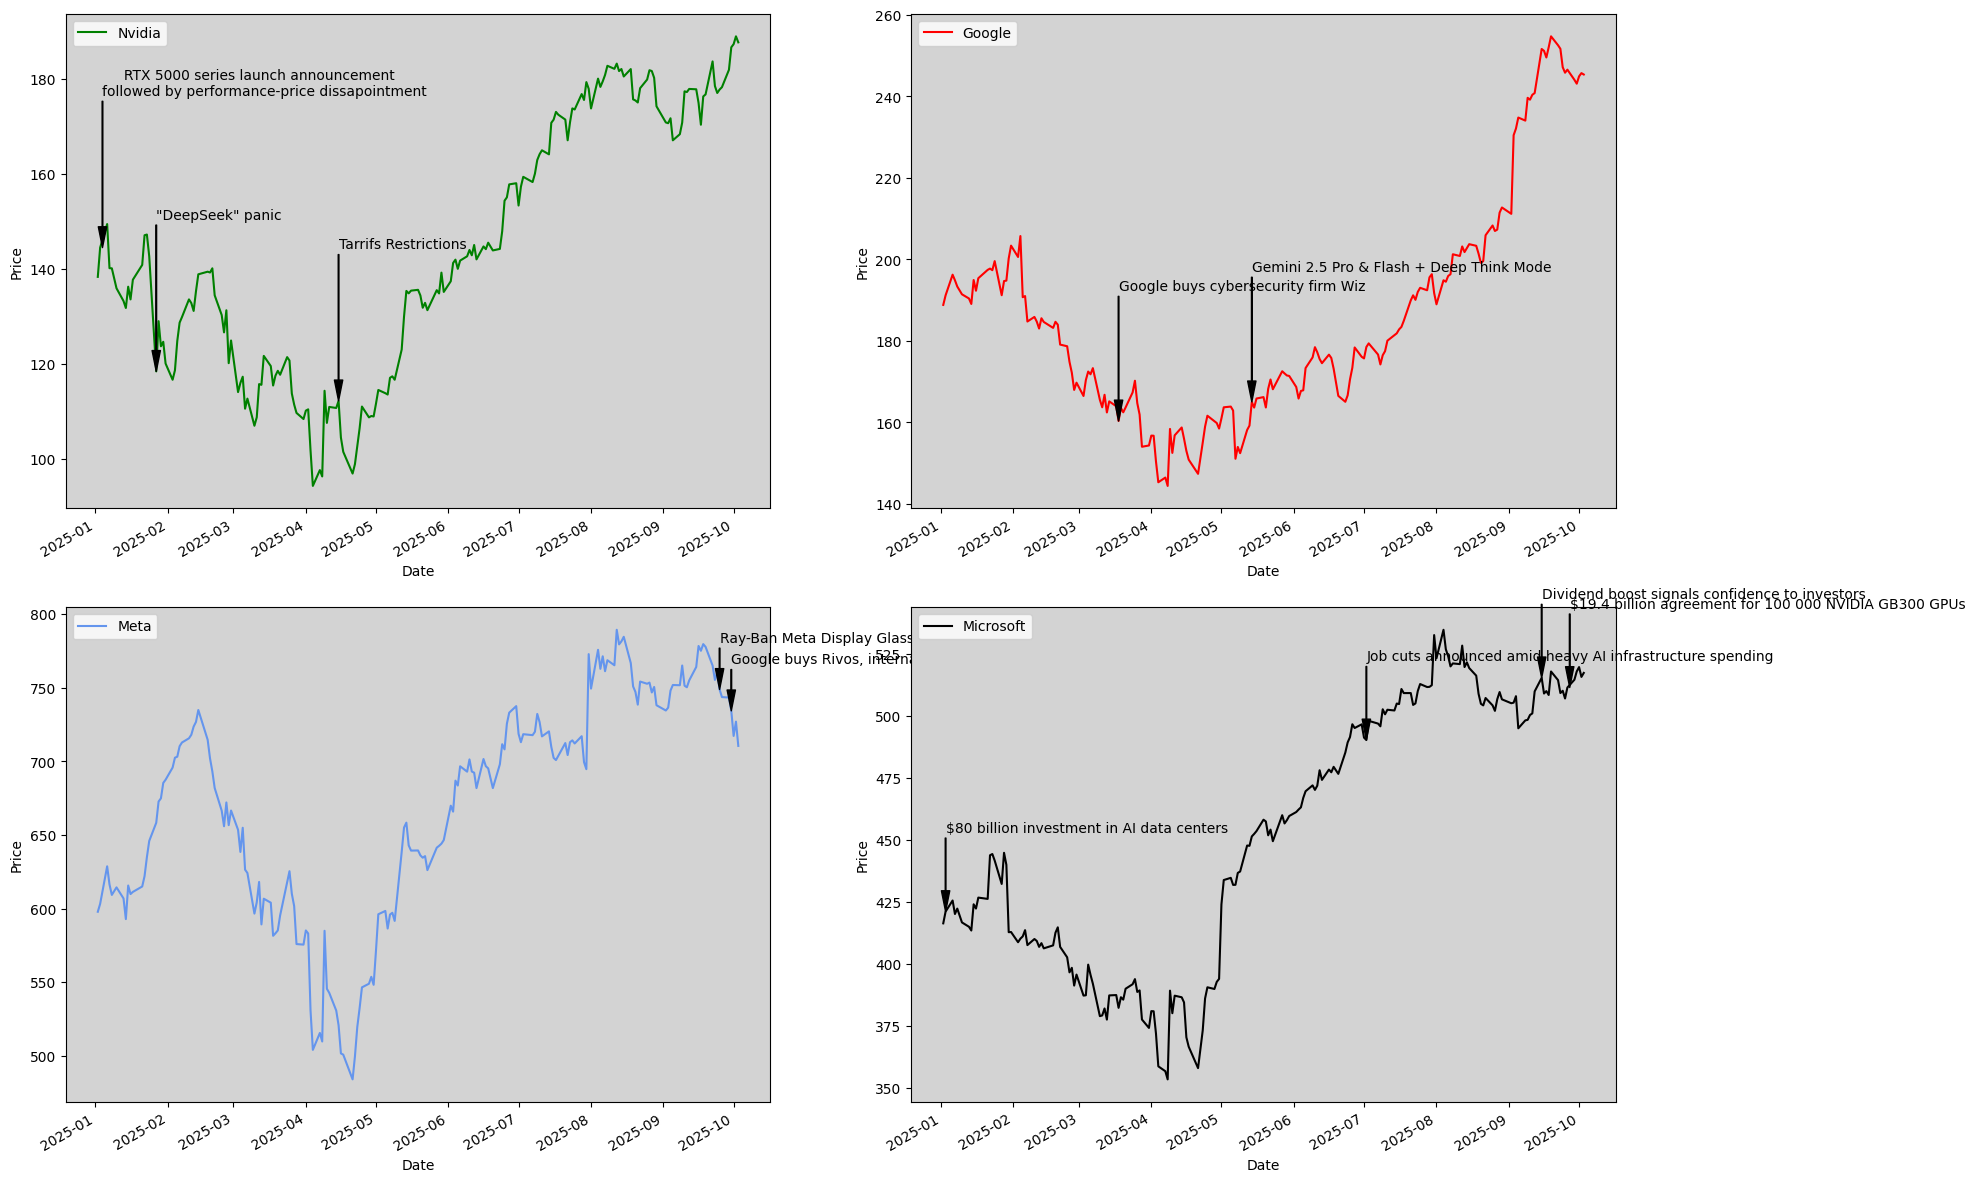

In [109]:
#Daily Prices

#Annotations
nvidia=[(datetime(2025,1,4), '     RTX 5000 series launch announcement\nfollowed by performance-price dissapointment'),
        (datetime(2025,1,27), '"DeepSeek" panic'),
        (datetime(2025,4,15), 'Tarrifs Restrictions')]
google=[(datetime(2025,5,14), 'Gemini 2.5 Pro & Flash + Deep Think Mode'),
        (datetime(2025,3,18), 'Google buys cybersecurity firm Wiz')]
meta=[(datetime(2025,9,25), 'Ray-Ban Meta Display Glasses & Neural Wristband'),
      (datetime(2025,9,30), 'Google buys Rivos, internal production of AI chips')]
microsoft=[(datetime(2025,1,3), '$80 billion investment in AI data centers'),
           (datetime(2025,9,27), '$19.4 billion agreement for 100 000 NVIDIA GB300 GPUs'),
           (datetime(2025,7,2), 'Job cuts announced amid heavy AI infrastructure spending'),
           (datetime(2025,9,15), 'Dividend boost signals confidence to investors')]

#Plot
fig=plt.figure(figsize=(20,16))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
df1['NVDA'].plot(ax=ax1, color='green', label='Nvidia', xlabel='Date', ylabel='Price')
df1['GOOGL'].plot(ax=ax2, color='red', label='Google', xlabel='Date', ylabel='Price')
df1['META'].plot(ax=ax3, color='cornflowerblue', label='Meta', xlabel='Date', ylabel='Price')
df1['MSFT'].plot(ax=ax4, color='black', label='Microsoft', xlabel='Date', ylabel='Price')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')
ax3.set_facecolor('lightgrey')
ax4.set_facecolor('lightgrey')

#Annotations
for date, announcement in nvidia:
  ax1.annotate(announcement,
               xy=(date, df1['NVDA'].asof(date)),
               xytext=(date, df1['NVDA'].asof(date)+32),
               arrowprops=dict(facecolor='black',
                               width=0.5,
                               headwidth=6,
                               headlength=15))
for date, announcement in google:
  ax2.annotate(announcement,
               xy=(date, df1['GOOGL'].asof(date)),
               xytext=(date, df1['GOOGL'].asof(date)+32),
               arrowprops=dict(facecolor='black',
                               width=0.5,
                               headwidth=6,
                               headlength=15))
for date, announcement in meta:
  ax3.annotate(announcement,
               xy=(date, df1['META'].asof(date)),
               xytext=(date, df1['META'].asof(date)+32),
               arrowprops=dict(facecolor='black',
                               width=0.5,
                               headwidth=6,
                               headlength=15))
for date, announcement in microsoft:
  ax4.annotate(announcement,
               xy=(date, df1['MSFT'].asof(date)),
               xytext=(date, df1['MSFT'].asof(date)+32),
               arrowprops=dict(facecolor='black',
                               width=0.5,
                               headwidth=6,
                               headlength=15))

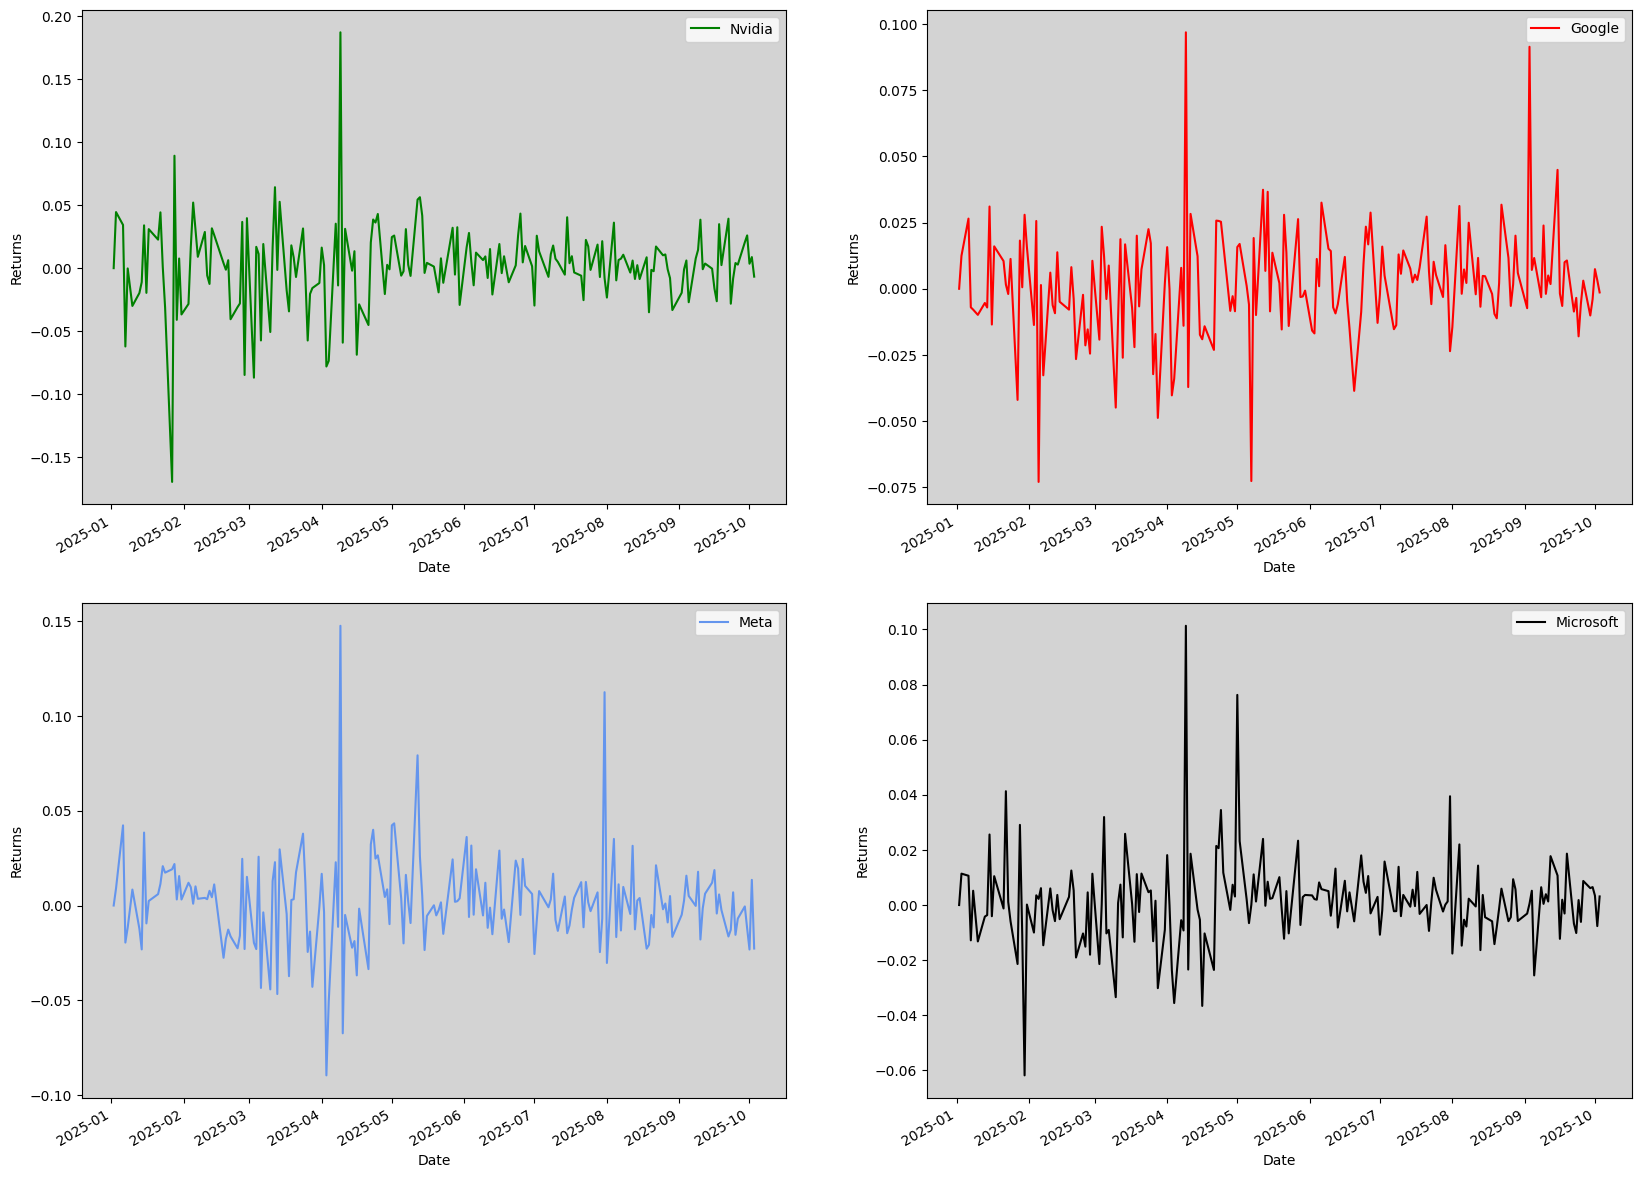

In [110]:
#Daily Returns

fig=plt.figure(figsize=(20,16))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
df1_returns['NVDA'].plot(ax=ax1, color='green', label='Nvidia', xlabel='Date', ylabel='Returns')
df1_returns['GOOGL'].plot(ax=ax2, color='red', label='Google', xlabel='Date', ylabel='Returns')
df1_returns['META'].plot(ax=ax3, color='cornflowerblue', label='Meta', xlabel='Date', ylabel='Returns')
df1_returns['MSFT'].plot(ax=ax4, color='black', label='Microsoft', xlabel='Date', ylabel='Returns')
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')
ax3.set_facecolor('lightgrey')
ax4.set_facecolor('lightgrey')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


Text(0.5, 0.98, 'Cumulative Returns')

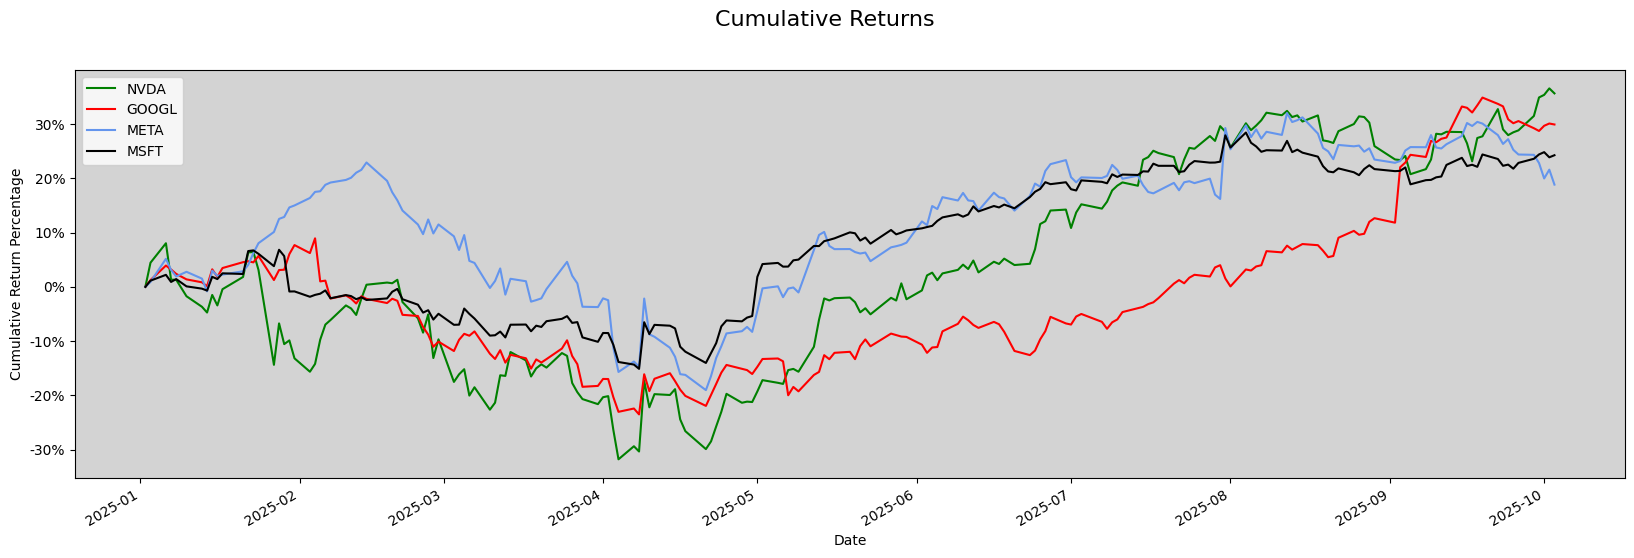

In [111]:
#Cumulative Returns
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,1,1)
df1_cum_returns.plot(ax=ax1, xlabel='Date', ylabel='Cumulative Return Percentage', color=['green', 'red', 'cornflowerblue', 'black'])
ax1.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
ax1.set_yticklabels(['-30%', '-20%', '-10%', '0%', '10%', '20%', '30%'])
ax1.set_facecolor('lightgrey')
fig.suptitle('Cumulative Returns', fontsize=16)


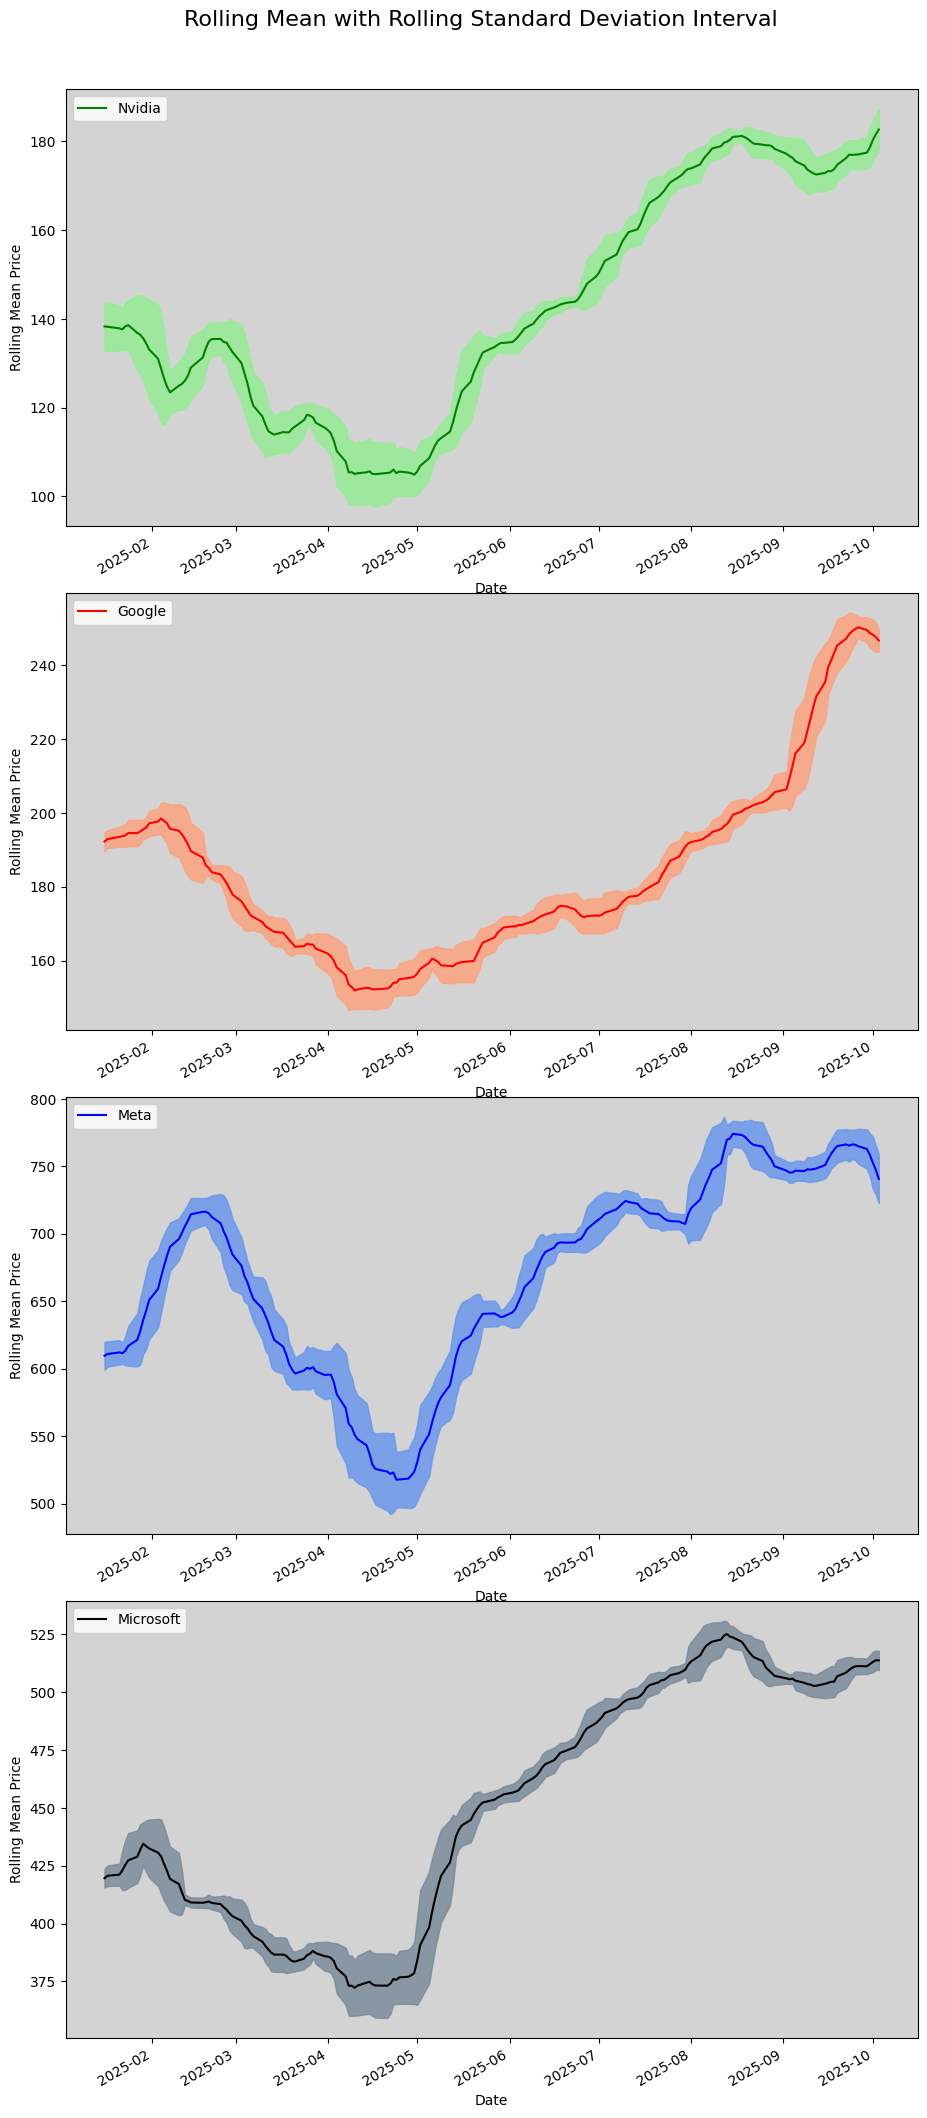

In [112]:
# Rolling Mean & STD
fig=plt.figure(figsize=(10,26))
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)
ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
fig.suptitle('Rolling Mean with Rolling Standard Deviation Interval', fontsize=16)
fig.tight_layout(pad=3.8)

df1_rolling_mean['NVDA'].plot(ax=ax1, color='green', label='Nvidia', xlabel='Date', ylabel='Rolling Mean Price')
df1_rolling_mean['GOOGL'].plot(ax=ax2, color='red', label='Google', xlabel='Date', ylabel='Rolling Mean Price')
df1_rolling_mean['META'].plot(ax=ax3, color='blue', label='Meta', xlabel='Date', ylabel='Rolling Mean Price')
df1_rolling_mean['MSFT'].plot(ax=ax4, color='black', label='Microsoft', xlabel='Date', ylabel='Rolling Mean Price')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')

ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')
ax3.set_facecolor('lightgrey')
ax4.set_facecolor('lightgrey')

ax1.fill_between(df1_rolling_std['NVDA'].index,
                 df1_rolling_mean['NVDA']-df1_rolling_std['NVDA'],
                 df1_rolling_mean['NVDA']+df1_rolling_std['NVDA'],
                 color='lightgreen',
                 alpha=0.8)

ax2.fill_between(df1_rolling_std['GOOGL'].index,
                 df1_rolling_mean['GOOGL']-df1_rolling_std['GOOGL'],
                 df1_rolling_mean['GOOGL']+df1_rolling_std['GOOGL'],
                 color='lightsalmon',
                 alpha=0.8)

ax3.fill_between(df1_rolling_std['META'].index,
                 df1_rolling_mean['META']-df1_rolling_std['META'],
                 df1_rolling_mean['META']+df1_rolling_std['META'],
                 color='cornflowerblue',
                 alpha=0.8)

ax4.fill_between(df1_rolling_std['MSFT'].index,
                 df1_rolling_mean['MSFT']-df1_rolling_std['MSFT'],
                 df1_rolling_mean['MSFT']+df1_rolling_std['MSFT'],
                 color='lightslategray',
                 alpha=0.8)

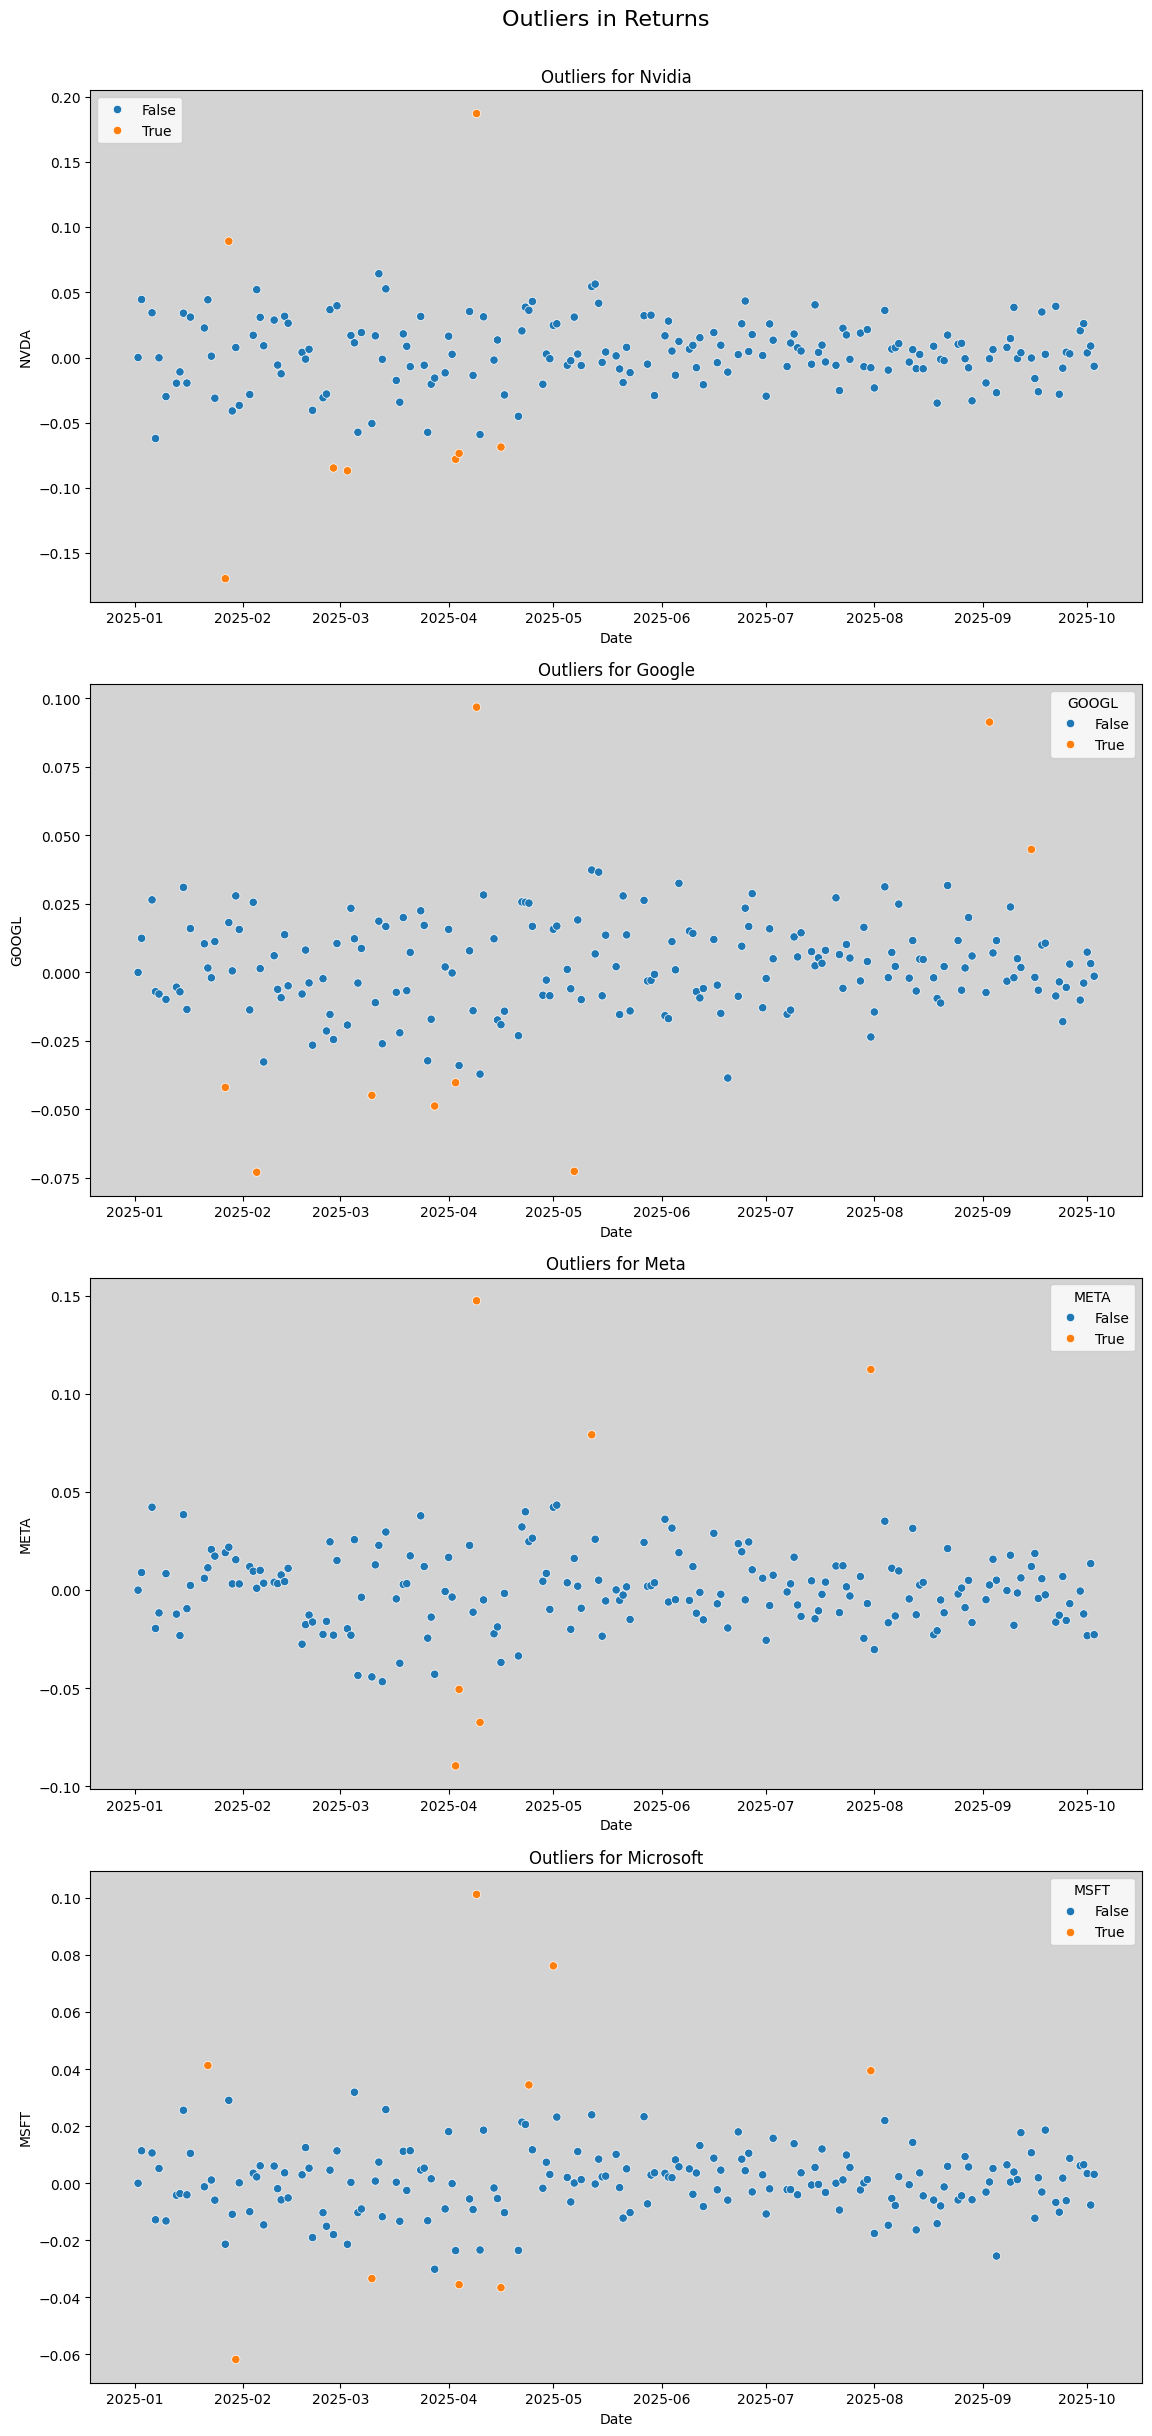

In [113]:
#Outliers in returns
fig=plt.figure(figsize=(12,25))
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)
ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
fig.suptitle('Outliers in Returns', fontsize=16)
fig.tight_layout(pad=3.8)

sns.scatterplot(data=df1_returns, x=df1_returns.index, y='NVDA', ax=ax1, color=['green','orange'], hue=df1_returns_outliers['NVDA'])
ax1.legend(loc='upper left')
sns.scatterplot(data=df1_returns, x=df1_returns.index, y='GOOGL', ax=ax2, color='green', hue=df1_returns_outliers['GOOGL'])
ax1.legend(loc='upper left')
sns.scatterplot(data=df1_returns, x=df1_returns.index, y='META', ax=ax3, color='green', hue=df1_returns_outliers['META'])
ax1.legend(loc='upper left')
sns.scatterplot(data=df1_returns, x=df1_returns.index, y='MSFT', ax=ax4, color='green', hue=df1_returns_outliers['MSFT'])
ax1.legend(loc='upper left')

ax1.set_title('Outliers for Nvidia')
ax2.set_title('Outliers for Google')
ax3.set_title('Outliers for Meta')
ax4.set_title('Outliers for Microsoft')

ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')
ax3.set_facecolor('lightgrey')
ax4.set_facecolor('lightgrey')

###**Statistical Characterisics**

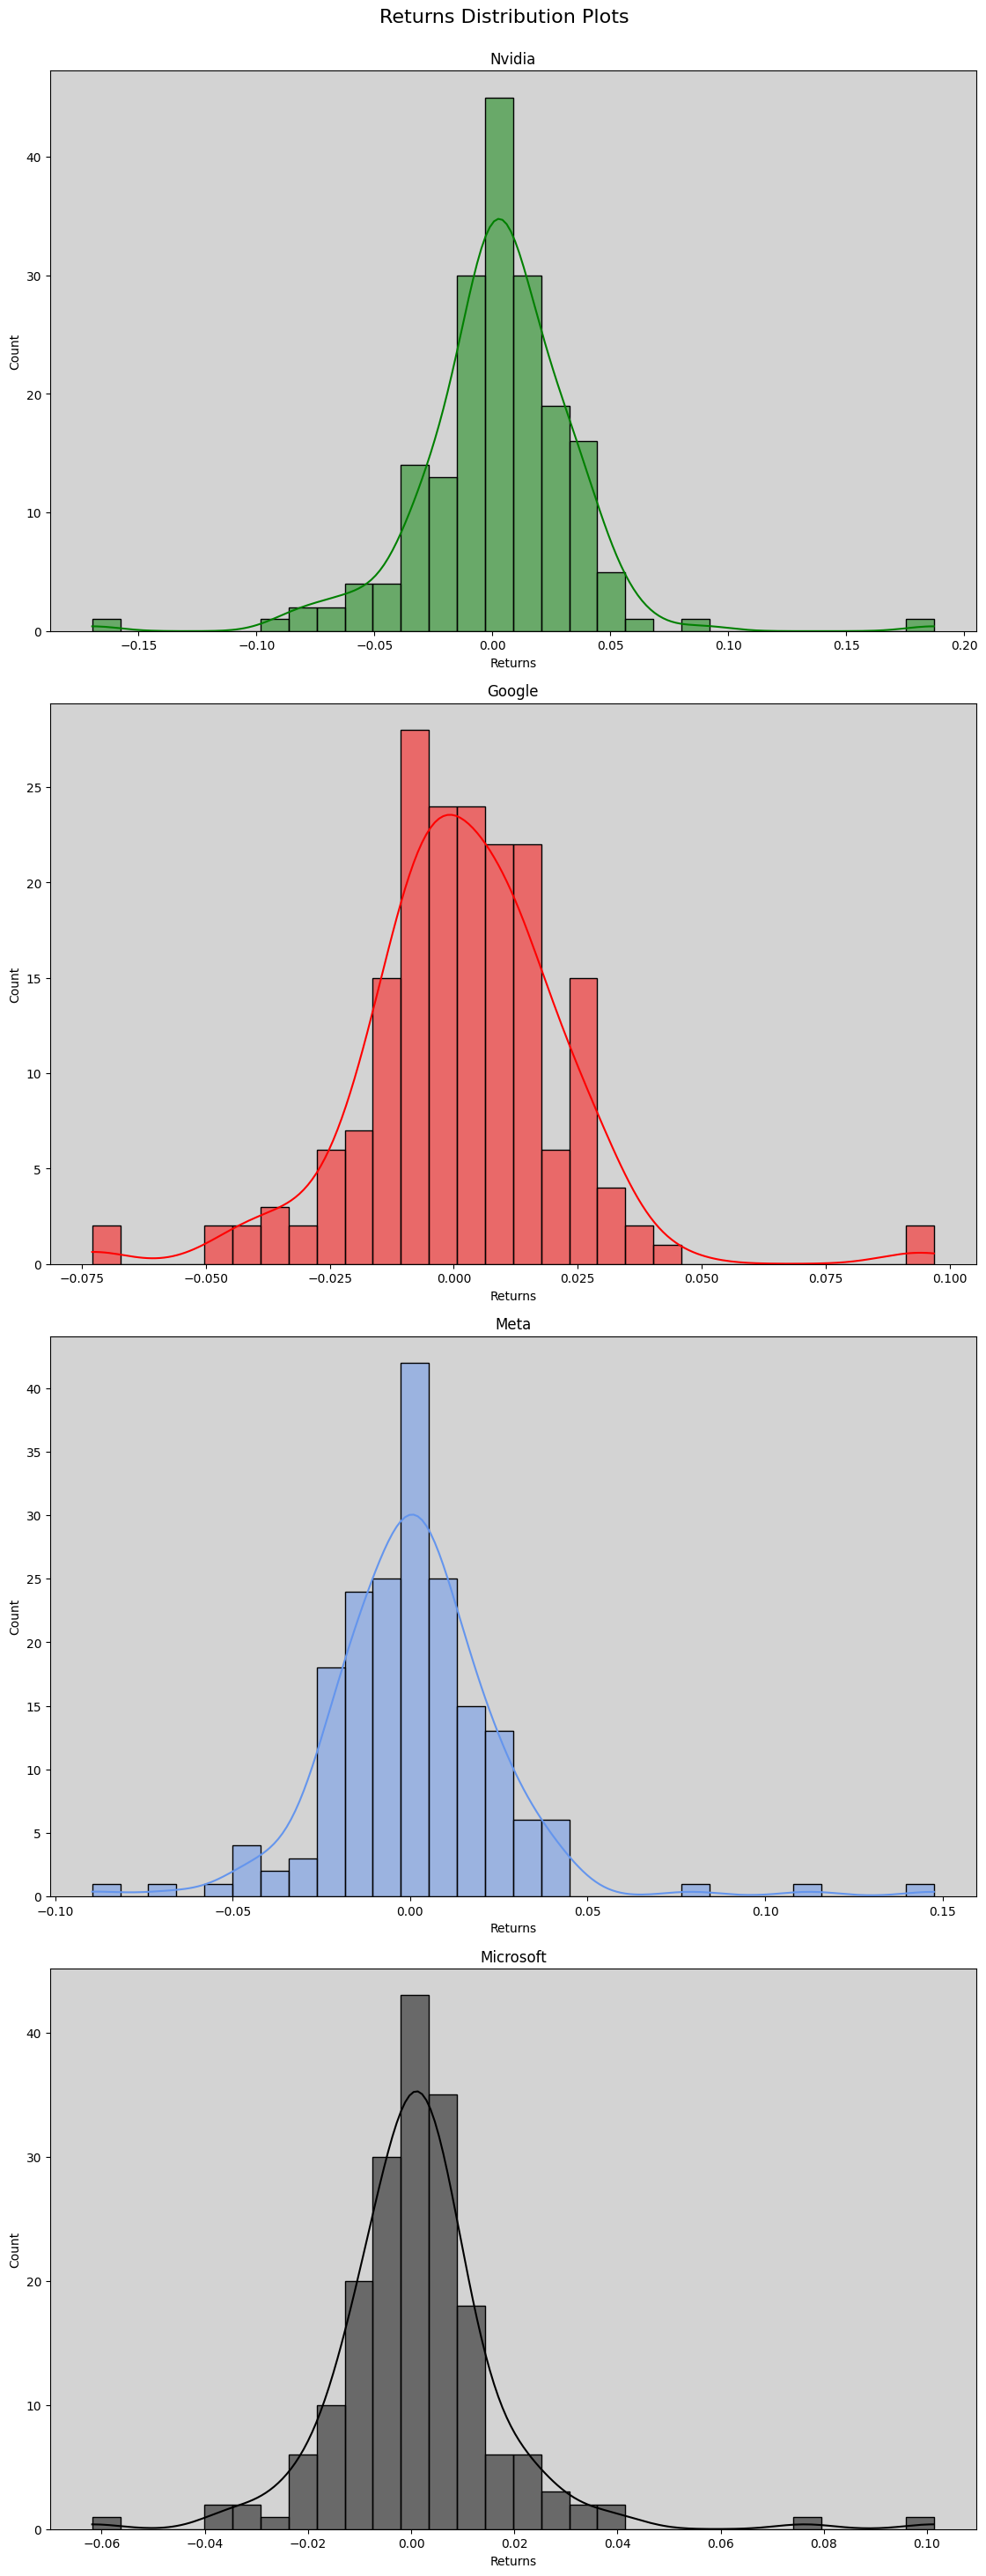

In [114]:
# Distribution Plots

fig=plt.figure(figsize=(12,30))
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)
ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
fig.suptitle('Returns Distribution Plots', fontsize=16)
fig.tight_layout(pad=3.8)

sns.histplot(data=df1_returns, ax=ax1, bins=30, x='NVDA', color='green', kde=True)
sns.histplot(data=df1_returns, ax=ax2, bins=30, x='GOOGL', color='red', kde=True)
sns.histplot(data=df1_returns, ax=ax3, bins=30, x='META', color='cornflowerblue', kde=True)
sns.histplot(data=df1_returns, ax=ax4, bins=30, x='MSFT', color='black', kde=True)

ax1.set_title('Nvidia')
ax2.set_title('Google')
ax3.set_title('Meta')
ax4.set_title('Microsoft')

ax1.set_xlabel('Returns')
ax2.set_xlabel('Returns')
ax3.set_xlabel('Returns')
ax4.set_xlabel('Returns')

ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')
ax3.set_facecolor('lightgrey')
ax4.set_facecolor('lightgrey')

Text(0.5, 1.0, 'Volume Correlation Matrix')

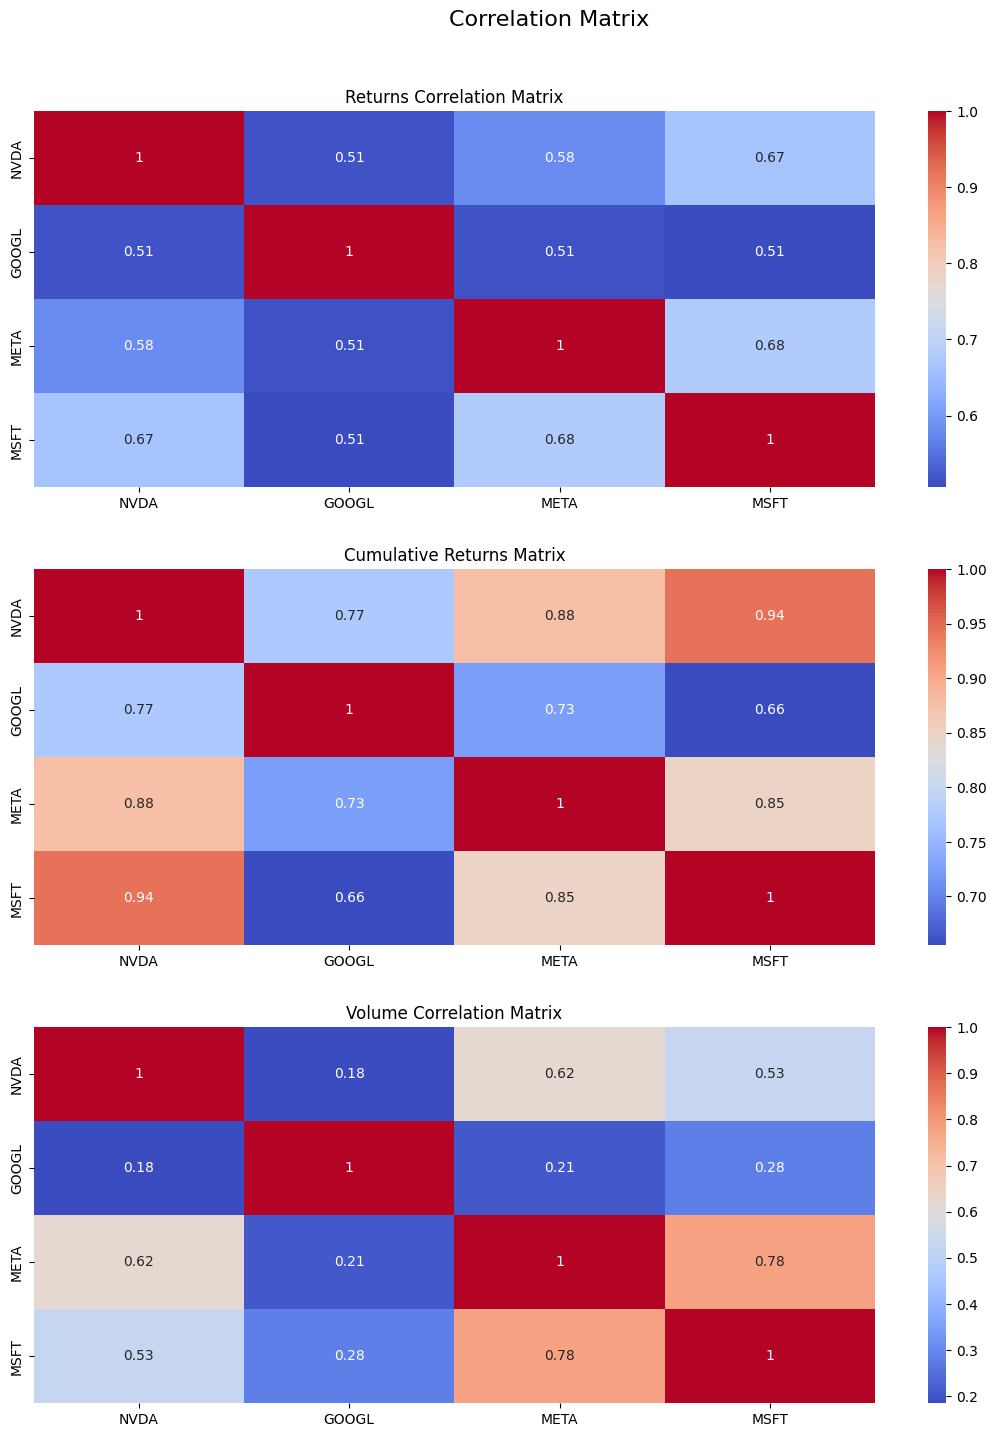

In [115]:
#Correlation
fig=plt.figure(figsize=(12,15))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
fig.suptitle('Correlation Matrix', fontsize=16)
fig.tight_layout(pad=3.8)

sns.heatmap(df1_returns.corr(), ax=ax1, annot=True, cmap='coolwarm')
ax1.set_title('Returns Correlation Matrix')
sns.heatmap(df1_cum_returns.corr(), ax=ax2, annot=True, cmap='coolwarm')
ax2.set_title('Cumulative Returns Matrix')
sns.heatmap(data=df2.corr(), ax=ax3, annot=True, cmap='coolwarm')
ax3.set_title('Volume Correlation Matrix')

Text(0, 0.5, 'Autocorrelation Coefficient')

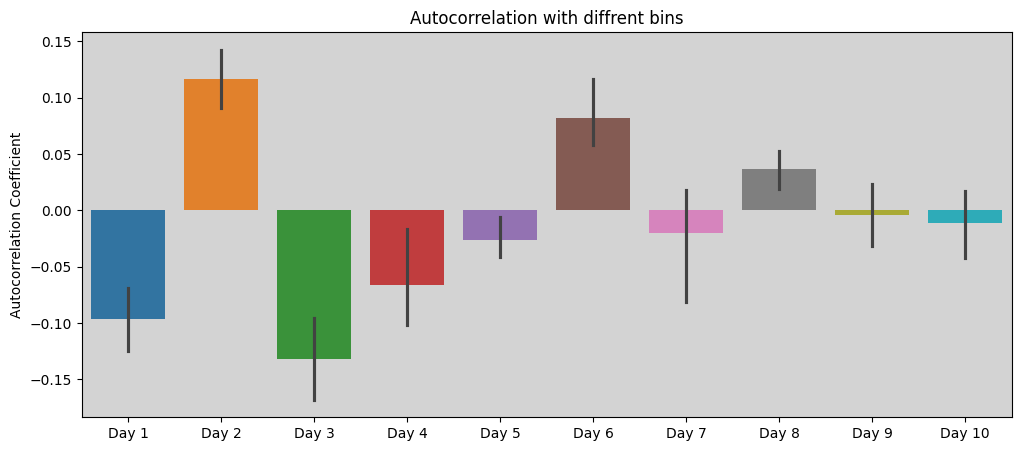

In [116]:
#Autocorrelation
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,1,1)
ax1.set_facecolor('lightgrey')
sns.barplot(ax=ax1, data=df_autocorr)
ax1.set_title('Autocorrelation with diffrent bins')
ax1.set_ylabel('Autocorrelation Coefficient')

## **Step 7: Summary and Insights**

In this section, we summarize key findings from the analysis:

- Identify which stocks are most volatile.
- Note correlations between stocks in the AI sector.
- Highlight any unusual patterns or outliers.

The summary is mathematically grounded, avoiding financial speculation.


While the code is feeding daily data on this project, **as of October 6, 2025** we have the following results:

1. The most Cumulative Returns are given by the following order: **Nvidia (with over 30%)**, Google, Microsoft, Meta.
2. Nvidia had intense instability in January, February and April. Google had intense instability in April. Meta had intense instability from mid March up to May and lastly Microsoft instability's period was from April up to mid May.
3. **Common outliers** for all stocks occured on **April**.
4. The biggest correlation coefficient for returns is **0.68** between **Microsoft and Meta** followed by 0.67 between Microsoft and Nvidia
5. **Biggest** Volume correlation coefficient is **0.78** for Microsoft and Meta while the **smallest** one is **0.18** for Nvidia and Google.
6. For this analysis the autocorrelation was computed separately for each stock however the plot is giving us the mean autocorreleation for each bin (Days 1-10). **Results** are prices from two days ago are mildly related to today’s prices and prices from three days ago tend to move slightly in the opposite direction of today’s prices.
7. Overall, the analysis suggests that while all four tech stocks exhibit moderate co-movement, Nvidia remains the most volatile and highest-performing asset in 2025 so far. Microsoft and Meta show strong mutual dependence in both returns and trading activity, indicating shared market dynamics.